In [1]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install google-play-scraper
!pip install -q transformers
!pip install textblob
!pip install bertopic
!pip install ipywidgets
!pip install mysql-connector-python --upgrade

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


ERROR: Invalid requirement: 'mysql-connector-python\xa0--upgrade': Expected end or semicolon (after name and no valid version specifier)
    mysql-connector-python --upgrade
                          ^


In [4]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://download.pytorch.org/whl/cpu
     ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
     ------ --------------------------------- 0.3/1.6 MB ? eta -:--:--
     ------------- -------------------------- 0.5/1.6 MB 1.5 MB/s eta 0:00:01
     ------------- -------------------------- 0.5/1.6 MB 1.5 MB/s eta 0:00:01
     -------------------------- ------------- 1.0/1.6 MB 1.2 MB/s eta 0:00:01
     ---------------------------------------- 1.6/1.6 MB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
     ------------ --------------------------- 0.8/2.4 MB 16.4 MB/s eta 0:00:01
     ----------------- ---------------------- 1.

In [5]:
import pandas as pd
import numpy as np
from google_play_scraper import app, Sort, reviews_all
import plotly.express as px

In [6]:
# Reviews_all Scrape the reviewid, username, content etc from the app page into a JSON format
Nash_Markets = reviews_all('com.chillanalytics.nashmarkets',sleep_milliseconds=0, sort=Sort.NEWEST)

In [7]:
Nash_Markets

[{'reviewId': 'd86be9b6-c8b1-4cab-9fb5-c7ef0207bba0',
  'userName': 'Lucky Alex',
  'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjXgHj4My_P7gt9P90-fQneur6hrVTIBdQIqKpuA7_9FdjWimRhv',
  'content': "My problem with the app is that it doesn't rotate",
  'score': 2,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '2.3.1',
  'at': datetime.datetime(2024, 12, 1, 19, 24, 3),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': '2.3.1'},
 {'reviewId': 'fcbc96c8-6c94-4e2e-be77-0d9eb252fdd6',
  'userName': 'Raphael Opala',
  'userImage': 'https://play-lh.googleusercontent.com/a/ACg8ocIAOcNxMhKP0WwaGlPkLq_xkkG7DN6r3UGwwR2DtG1qGrh6Zg=mo',
  'content': 'I am getting some difficulties when typing the take profit price.',
  'score': 4,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '2.3.1',
  'at': datetime.datetime(2024, 10, 22, 6, 28, 49),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': '2.3.1'},
 {'reviewId': '97447ddb-ad8a-462c-8d4f-a0299bb17431',
  'userName'

In [8]:
# convert the json data into a dataframe
Nash_Markets_df = pd.json_normalize(Nash_Markets)

In [9]:
Nash_Markets_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,d86be9b6-c8b1-4cab-9fb5-c7ef0207bba0,Lucky Alex,https://play-lh.googleusercontent.com/a-/ALV-U...,My problem with the app is that it doesn't rotate,2,0,2.3.1,2024-12-01 19:24:03,None,NaT,2.3.1
1,fcbc96c8-6c94-4e2e-be77-0d9eb252fdd6,Raphael Opala,https://play-lh.googleusercontent.com/a/ACg8oc...,I am getting some difficulties when typing the...,4,0,2.3.1,2024-10-22 06:28:49,None,NaT,2.3.1
2,97447ddb-ad8a-462c-8d4f-a0299bb17431,Ahmed Pro,https://play-lh.googleusercontent.com/a-/ALV-U...,"The best I have used, tells you the lot size t...",5,0,2.3.1,2024-09-20 00:50:04,None,NaT,2.3.1
3,c07a780b-ec90-44f8-8fed-81a29c6eea5d,Daniel Arome,https://play-lh.googleusercontent.com/a/ACg8oc...,Of late is given me wrong entries can you plea...,3,0,2.3.1,2024-07-17 11:08:27,None,NaT,2.3.1
4,c31ba30f-4598-4fea-994f-116dd878d78a,Amal Prakash,https://play-lh.googleusercontent.com/a/ACg8oc...,Bring a button to switch off haptic vibration ...,2,0,2.3.1,2024-07-13 10:47:22,None,NaT,2.3.1


In [10]:
Nash_Markets_df.shape

(24, 11)

## Sentiment Analysis

In [11]:
from transformers import pipeline

# Save the model locally
model_name = "siebert/sentiment-roberta-large-english"
save_path = "/content/sample_data"  # Directory to save the model

In [12]:
pip install tf-keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
# Load the pipeline and save the model
sentiment_analysis = pipeline("sentiment-analysis", model=model_name)
sentiment_analysis.save_pretrained(save_path)

# Reuse the saved model
sentiment_analysis_reuse = pipeline("sentiment-analysis", model=save_path)

pytorch_model.bin:  96%|#########5| 1.36G/1.42G [00:00<?, ?B/s]

C:\Users\perma\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\perma\.cache\huggingface\hub\models--siebert--sentiment-roberta-large-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


tokenizer_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cpu
Device set to use cpu


In [15]:
# Test the reused model
# play with the parameter and see if it works

result = sentiment_analysis_reuse("Maryam keep the same positve energy and bad")
print(result)

[{'label': 'POSITIVE', 'score': 0.9301064014434814}]


In [16]:
#removing wildcharacter and cleaning the content column by casting to a str
Nash_Markets_df['content_new']= Nash_Markets_df['content'].astype('str')

In [17]:
Nash_Markets_df['result'] = Nash_Markets_df['content_new'].apply(lambda x: sentiment_analysis_reuse(x))

In [18]:
Nash_Markets_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_new,result
0,d86be9b6-c8b1-4cab-9fb5-c7ef0207bba0,Lucky Alex,https://play-lh.googleusercontent.com/a-/ALV-U...,My problem with the app is that it doesn't rotate,2,0,2.3.1,2024-12-01 19:24:03,None,NaT,2.3.1,My problem with the app is that it doesn't rotate,"[{'label': 'NEGATIVE', 'score': 0.999489903450..."
1,fcbc96c8-6c94-4e2e-be77-0d9eb252fdd6,Raphael Opala,https://play-lh.googleusercontent.com/a/ACg8oc...,I am getting some difficulties when typing the...,4,0,2.3.1,2024-10-22 06:28:49,None,NaT,2.3.1,I am getting some difficulties when typing the...,"[{'label': 'NEGATIVE', 'score': 0.999395370483..."
2,97447ddb-ad8a-462c-8d4f-a0299bb17431,Ahmed Pro,https://play-lh.googleusercontent.com/a-/ALV-U...,"The best I have used, tells you the lot size t...",5,0,2.3.1,2024-09-20 00:50:04,None,NaT,2.3.1,"The best I have used, tells you the lot size t...","[{'label': 'POSITIVE', 'score': 0.997966170310..."
3,c07a780b-ec90-44f8-8fed-81a29c6eea5d,Daniel Arome,https://play-lh.googleusercontent.com/a/ACg8oc...,Of late is given me wrong entries can you plea...,3,0,2.3.1,2024-07-17 11:08:27,None,NaT,2.3.1,Of late is given me wrong entries can you plea...,"[{'label': 'NEGATIVE', 'score': 0.999397993087..."
4,c31ba30f-4598-4fea-994f-116dd878d78a,Amal Prakash,https://play-lh.googleusercontent.com/a/ACg8oc...,Bring a button to switch off haptic vibration ...,2,0,2.3.1,2024-07-13 10:47:22,None,NaT,2.3.1,Bring a button to switch off haptic vibration ...,"[{'label': 'NEGATIVE', 'score': 0.996596753597..."


In [19]:
# spliting the result into sentiment and score
Nash_Markets_df['sentiment'] = Nash_Markets_df['result'].apply(lambda x: (x[0]['label']))
Nash_Markets_df['score'] = Nash_Markets_df['result'].apply(lambda x: (x[0]['score']))

In [20]:
Nash_Markets_df[['content','score','sentiment']]

,content,score,sentiment
0,My problem with the app is that it doesn't rotate,0.999490,NEGATIVE
1,I am getting some difficulties when typing the...,0.999395,NEGATIVE
2,"The best I have used, tells you the lot size t...",0.997966,POSITIVE
3,Of late is given me wrong entries can you plea...,0.999398,NEGATIVE
4,Bring a button to switch off haptic vibration ...,0.996597,NEGATIVE
5,Easy to use. Fast in enabling you calculate yo...,0.998866,POSITIVE
6,Best app ever,0.998596,POSITIVE
7,Does not let me select account size or input s...,0.998897,NEGATIVE
8,best app for risk manage ment,0.998272,POSITIVE
9,Kudos to the team 👏,0.998860,POSITIVE


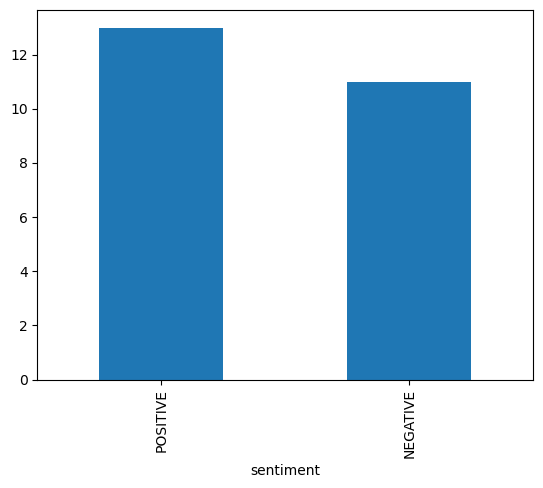

In [21]:
Nash_Markets_df['sentiment'].value_counts().plot(kind='bar');

## Topic modeling

In [22]:
#generate a series for the reviews
feature_google=Nash_Markets_df['content']
print(feature_google.size)
feature_google.head()

24


0    My problem with the app is that it doesn't rotate
1    I am getting some difficulties when typing the...
2    The best I have used, tells you the lot size t...
3    Of late is given me wrong entries can you plea...
4    Bring a button to switch off haptic vibration ...
Name: content, dtype: object

In [23]:
# Import the necessary libraries
from textblob import TextBlob


# Define a function to translate the text to English
def translate_to_en(text):
    blob = TextBlob(str(text))
    try:
        return str(blob.translate(to='en'))
    except:
        return str(text)

# Apply the translate_to_en function to the 'review' column of the DataFrame
feature_google = feature_google.apply(translate_to_en)

# Print the top 5 rows of the DataFrame with the new 'review_en' column
print(feature_google.head())

0    My problem with the app is that it doesn't rotate
1    I am getting some difficulties when typing the...
2    The best I have used, tells you the lot size t...
3    Of late is given me wrong entries can you plea...
4    Bring a button to switch off haptic vibration ...
Name: content, dtype: object


In [24]:
!pip install bertopic

from bertopic import BERTopic

topic_model = BERTopic()
topics, probs = topic_model.fit_transform(feature_google.
                                   astype(str))

Defaulting to user installation because normal site-packages is not writeable


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [25]:
topic_model.get_topic_info().head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,24,-1_the_to_you_it,"[the, to, you, it, for, not, app, and, tp, input]",[TP value tab not effective. Only allows few d...


In [26]:
# the data to excel
output_file = 'playstore_reviews.xlsx'
Nash_Markets_df.to_excel(output_file, index=False)

In [27]:
pip install mysql-connector-python


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
    --------------------------------------- 0.3/16.1 MB ? eta -:--:--
    --------------------------------------- 0.3/16.1 MB ? eta -:--:--
    --------------------------------------- 0.3/16.1 MB ? eta -:--:--
    --------------------------------------- 0.3/16.1 MB ? eta -:--:--
    --------------------------------------- 0.3/16.1 MB ? eta -:--:--
    --------

In [32]:

dataframe=Nash_Markets_df


data = [tuple(row) for row in Nash_Markets_df.to_numpy()]


# Check if any column contains lists
for col in dataframe.columns:
    if dataframe[col].apply(lambda x: isinstance(x, list)).any():
        print(f"Column '{col}' contains list values.")


# Flatten lists into comma-separated strings
for col in dataframe.columns:
    dataframe[col] = dataframe[col].apply(
        lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x
    )


# Replace NaN with None
dataframe = dataframe.where(pd.notnull(dataframe), None)


Column 'result' contains list values.


In [39]:
import mysql.connector
import pandas as pd

DB_CONFIG = {
    'host': 'localhost',
    'user': 'root',
    'password': 'Dahiru@2411',
    'database': 'playstore_reviews'
}

def create_connection():
    try:
        conn = mysql.connector.connect(**DB_CONFIG)
        print("Connected to MySQL Database!")
        return conn
    except mysql.connector.Error as err:
        if err.errno == 1049:
            print(f"Database '{DB_CONFIG['database']}' does not exist. Creating it...")
            temp_config = DB_CONFIG.copy()
            temp_config.pop('database')
            conn = mysql.connector.connect(**temp_config)
            cursor = conn.cursor()
            cursor.execute(f"CREATE DATABASE {DB_CONFIG['database']}")
            print(f"Database '{DB_CONFIG['database']}' created successfully!")
            cursor.close()
            conn.close()
            conn = mysql.connector.connect(**DB_CONFIG)
            return conn
        else:
            print(f"Error: {err}")
            return None

def infer_mysql_data_type(dtype, column_name=None):
    if column_name == "reviewId":  # Ensure `reviewId` is always VARCHAR(255)
        return "VARCHAR(255)"
    elif pd.api.types.is_integer_dtype(dtype):
        return "INT"
    elif pd.api.types.is_float_dtype(dtype):
        return "FLOAT"
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return "DATETIME"
    else:
        return "TEXT"

def create_table_from_dataframe(cursor, df, table_name):
    columns_with_types = []
    for col in df.columns:
        dtype = df[col].dtype
        mysql_type = infer_mysql_data_type(dtype, column_name=col)
        columns_with_types.append(f"`{col}` {mysql_type}")

    create_table_query = f"""
    CREATE TABLE IF NOT EXISTS `{table_name}` (
        {", ".join(columns_with_types)},
        PRIMARY KEY (`reviewId`)
    )
    """
    cursor.execute(create_table_query)
    print(f"Table `{table_name}` created successfully!")

def insert_data_from_dataframe(cursor, conn, df, table_name):
    # Convert datetime columns to MySQL-compatible string format
    for col in df.columns:
        if pd.api.types.is_datetime64_any_dtype(df[col]):
            df[col] = df[col].dt.strftime('%Y-%m-%d %H:%M:%S')

    # Replace NaN with None for MySQL compatibility
    df = df.where(pd.notnull(df), None)

    # Prepare the insert query
    columns = ", ".join([f"`{col}`" for col in df.columns])
    placeholders = ", ".join(["%s"] * len(df.columns))
    insert_query = f"""
    INSERT INTO `{table_name}` ({columns})
    VALUES ({placeholders})
    ON DUPLICATE KEY UPDATE {", ".join([f"`{col}` = VALUES(`{col}`)" for col in df.columns])}
    """

    # Convert DataFrame rows to tuples
    data = [tuple(row) for row in df.to_numpy()]

    # Execute the query
    cursor.executemany(insert_query, data)
    conn.commit()
    print(f"{cursor.rowcount} rows inserted/updated successfully!")


def main():
    conn = create_connection()
    if conn is None:
        print("Failed to connect to the database. Exiting.")
        return

    cursor = conn.cursor()

    global dataframe
    if 'dataframe' not in globals():
        print("DataFrame `dataframe` is not defined. Exiting.")
        return

    datetime_columns = ['at', 'repliedAt']
    for col in datetime_columns:
        if col in dataframe.columns:
            dataframe[col] = pd.to_datetime(dataframe[col], errors='coerce')

    table_name = "playstore_reviews"
    create_table_from_dataframe(cursor, dataframe, table_name)
    insert_data_from_dataframe(cursor, conn, dataframe, table_name)

    cursor.close()
    conn.close()
    print("MySQL connection closed.")

if __name__ == "__main__":
    dataframe = dataframe

    main()


Connected to MySQL Database!
Table `playstore_reviews` created successfully!
24 rows inserted/updated successfully!
MySQL connection closed.
